In [68]:
from idlelib import history

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow.keras import *

In [53]:
###------------------
### Global Parameters
###------------------

# Directories
#inpDir = '../../input'
inpDir = Path('..') / '..' / 'input'
# outDir = '../output'
outDir = Path('..') / 'output'

#CONSTS

NOISE = 0.2
EPOCHS = 100
ALPHA = 0.001
N_SAMPLES = 1000
RANDOM_STATE = 24
TEST_SIZE  = 0.2 # Size of test data
CMAP = plt.cm.coolwarm


# Parameters for plotting
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }


#np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
rng = np.random.default_rng(seed = RANDOM_STATE)
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')
plt.style.use("dark_background")

In [13]:
# physical_device=tf.config.list_physical_devices('GPU')
# if len(physical_device)>0:
#     tf.config.experimental.set_memory_growth(physical_device[0],True)

In [14]:
df=pd.read_csv(r"D:\sharefolder\Datasets\wine.csv")
df.head()

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
df.isnull().sum()

Class              0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoid       0
Proanthocyanins    0
Intensity          0
Hue                0
OD280              0
Proline            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoid     178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Intensity        178 non-null    float64
 11  Hue              178 non-null    float64
 12  OD280            178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [18]:
for col in df.columns:
    print(f"col:{col}-->{df[col].unique()}")

col:Class-->[1 2 3]
col:Alcohol-->[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
col:Malic-->[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 

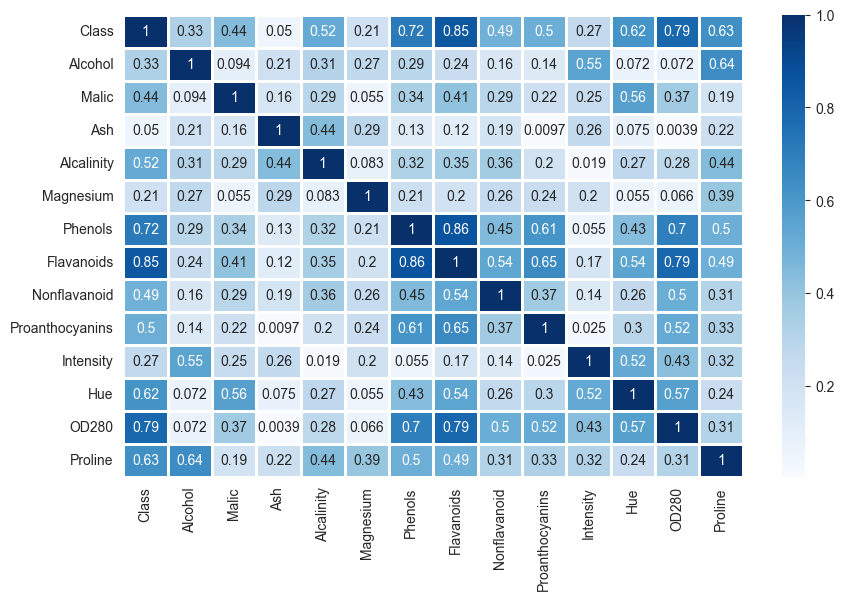

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr().abs(),cmap='Blues',annot=True,fmt='.2g',linewidths=0.8)
plt.show()

In [20]:
labels=df[df.columns[0]]
features_df=df.drop('Class',axis=1)
features_df.shape,labels.shape

((178, 13), (178,))

In [21]:
X_train,X_test,y_train,y_test=train_test_split(features_df,labels,test_size=0.20,random_state=RANDOM_SATE,stratify=labels)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [22]:
from matplotlib import scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
le=LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [24]:
def fn_softmax(z):
    exp_score=np.exp(z-np.max(z))
    return exp_score / np.sum()


## Define Model

In [81]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(3)
])

In [82]:
print(model)

<Sequential name=sequential_4, built=True>


In [83]:
predictions = model(X_train[:1])#.numpy()
predictions

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.05355038, -0.7941127 ,  0.34830654]], dtype=float32)>

In [84]:
tf.nn.softmax(predictions).numpy().sum()

np.float32(1.0000001)

In [85]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [86]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [87]:

y_train[:1].shape,predictions.shape

((1,), TensorShape([1, 3]))

In [88]:
loss_fn(y_train[:1],predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0890477895736694>

In [89]:
optimizer = tf.keras.optimizers.Adam(learning_rate = ALPHA)

In [90]:
model.compile(optimizer = optimizer, loss = loss_fn,metrics = ['accuracy'])

In [91]:
history = model.fit(X_train,y_train,validation_data = [X_test,y_test],epochs = EPOCHS)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.3310 - loss: 1.2262 - val_accuracy: 0.2778 - val_loss: 1.2800
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3592 - loss: 1.1764 - val_accuracy: 0.3333 - val_loss: 1.2342
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3803 - loss: 1.1299 - val_accuracy: 0.3333 - val_loss: 1.1917
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3944 - loss: 1.0874 - val_accuracy: 0.4167 - val_loss: 1.1509
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4507 - loss: 1.0463 - val_accuracy: 0.4167 - val_loss: 1.1110
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4789 - loss: 1.0074 - val_accuracy: 0.4444 - val_loss: 1.0731
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5282 - loss: 0.9692 - val_accuracy: 0.5278 - val_loss: 1.0377
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5704 - loss: 0.9324 - val_accuracy: 0.5278 - val_loss:

In [92]:
model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8889 - loss: 0.2078


[0.2077939510345459, 0.8888888955116272]

In [93]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.330986,1.226189,0.277778,1.279957
1,0.359155,1.176437,0.333333,1.234192
2,0.380282,1.129875,0.333333,1.191736
3,0.394366,1.087387,0.416667,1.150911
4,0.450704,1.046271,0.416667,1.110988
...,...,...,...,...
95,0.992958,0.093243,0.888889,0.212745
96,0.992958,0.091614,0.888889,0.211479
97,0.992958,0.090098,0.888889,0.210170
98,0.992958,0.088651,0.888889,0.208854


# functional api

In [94]:
# inputs = tf.keras.Input(shape =(X_train.shape[1]))
# x = tf.keras.layers.Dense(8,activation = 'relu')(inputs)
# outputs = tf.keras.layers.Dense(3)(x)
# model1 = tf.keras.Model(inputs = inputs,outputs = outputs